In [1]:
import os

import matplotlib.pyplot as plt

from Data_handling.Import import import_hdf5, DataSet, drive_letter
from Calibrations.Calibration_analysis import Analyzer

base_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Measurements\Calibration'
image_loc = rf'{drive_letter()}:\OneDrive - TU Eindhoven\Master thesis\Plots\Calibration\NO2 pH'
dependent = 'pH'
variable_name = 'pH'
data = import_hdf5(os.path.join(base_loc, r'NO2 pH 2\data.hdf5'), dependent)

variable_factor = 1
wavelength_range = [180, 450]
r2_values = [0.99, 1]
wavelength_plot_every = 5
plot_measurement_num = 2
baseline_correction = [450, 500]

if not os.path.exists(image_loc):
    os.makedirs(image_loc)

analyzer = Analyzer.from_DataSet(DataSet.from_simple(data, wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')
analyzer2 = Analyzer.from_DataSet(DataSet.from_simple(import_hdf5(os.path.join(base_loc, r'NO2 pH\data.hdf5'), dependent), wavelength_range, plot_measurement_num, baseline_correction), variable_factor, variable_name, 'turbo')

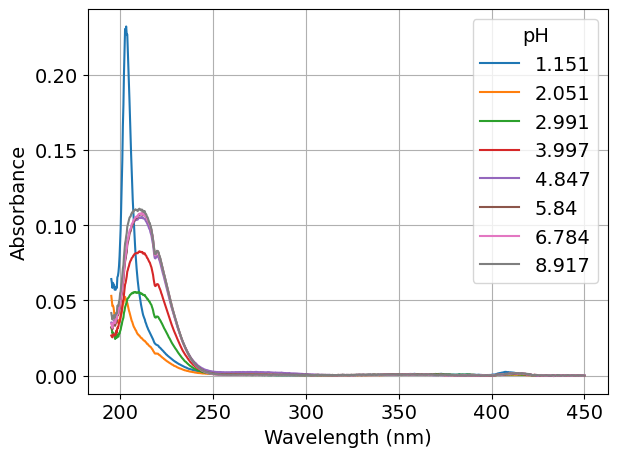

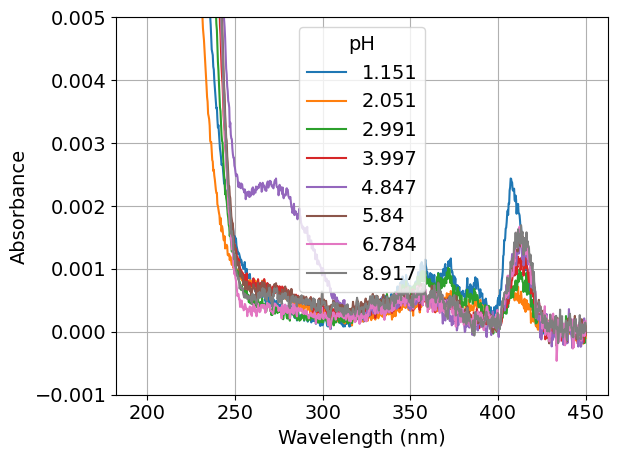

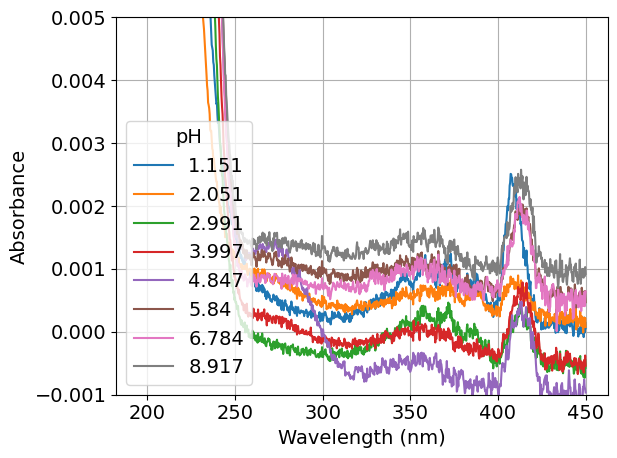

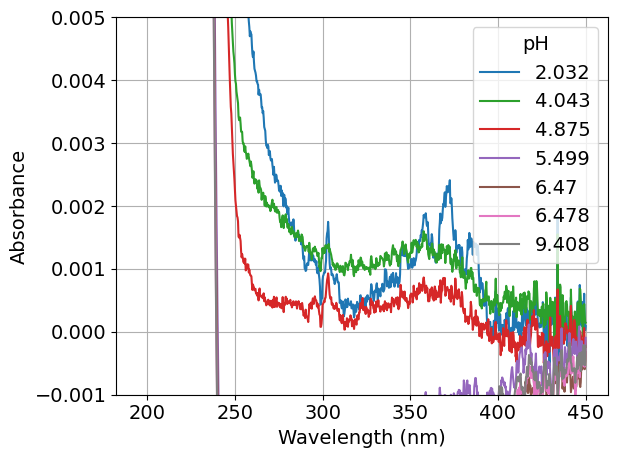

In [2]:
analyzer.absorbance_vs_wavelength_with_variable(save_loc=image_loc)
plt.show()

analyzer.absorbance_vs_wavelength_with_variable(plot_kwargs={'ylim': [-0.001, 0.005]}, save_loc=image_loc, save_suffix=' zoom')
plt.show()

analyzer.absorbance_vs_wavelength_with_variable(corrected=False, plot_kwargs={'ylim': [-0.001, 0.005]}, save_loc=image_loc, save_suffix=' zoom uncorr')
plt.show()

analyzer2.absorbance_vs_wavelength_with_variable( plot_kwargs={'ylim': [-0.001, 0.005]})
plt.show()